In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from forwards import InPaint_utils

In [6]:
result_file = '/home/blevac/Diffusion_Inverse/ip_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
diff_recon = cont['recon']
meas = cont['meas']
ip_utils = cont['forward_utils']
adj_img = ip_utils.adjoint(meas)
print(cont['nrmse'])

dict_keys(['gt_img', 'recon', 'meas', 'forward_utils', 'nrmse'])
0.1725402170004509


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


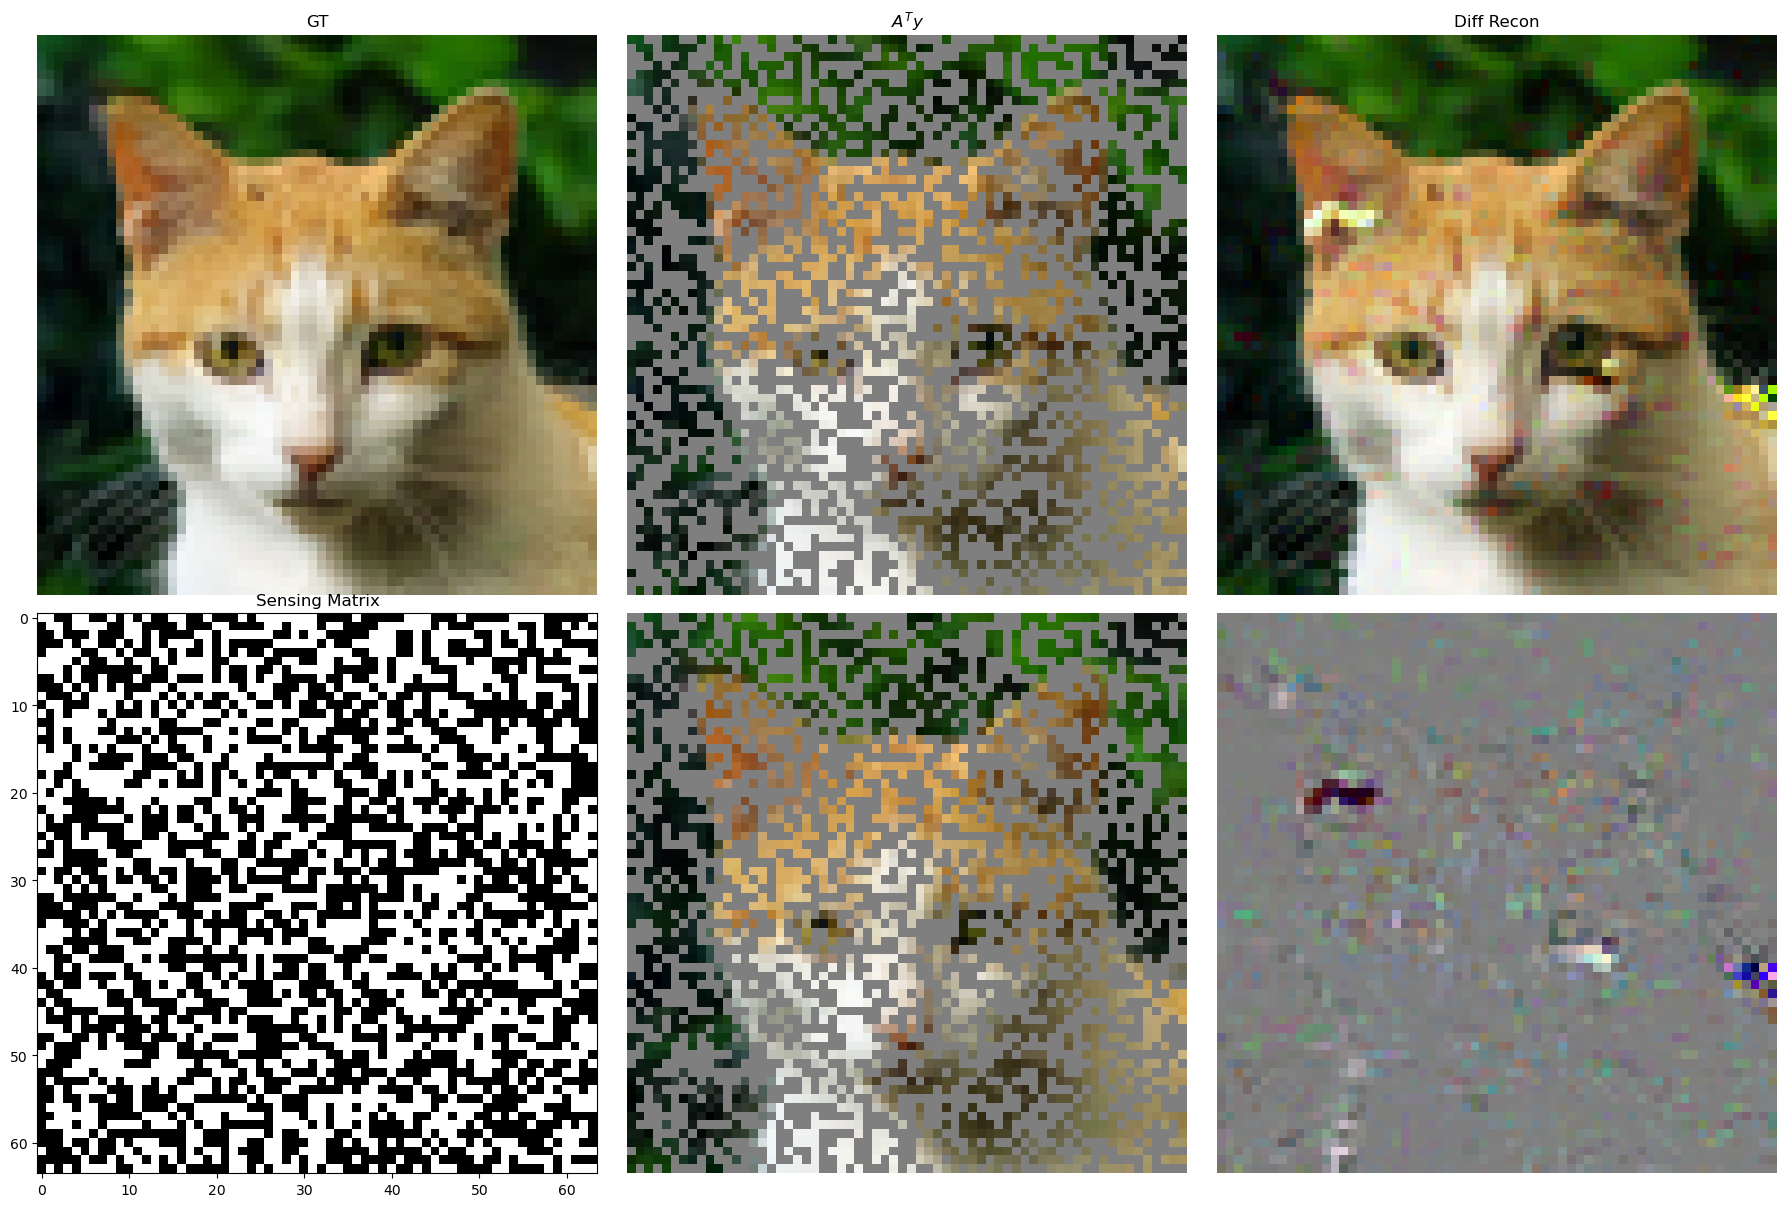

In [7]:
plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
plt.title('GT')
plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,5)
plt.title('Sensing Matrix')
plt.imshow(ip_utils.A[0,0].cpu(),cmap='gray')
# plt.axis('off')

plt.subplot(2,4,2)
plt.title('$A^Ty$')
plt.imshow((adj_img[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(((gt_img-adj_img)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
plt.axis('off')


plt.subplot(2,4,3)
plt.title('Diff Recon')
plt.imshow((diff_recon[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu() + 1) /2,cmap='gray')
plt.axis('off')
plt.tight_layout(pad=1.0)
